In [ ]:
## LIBRERIAS PARA ANALISIS ESTADISTICO Y MATEMATICO
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy.fftpack import fft,fftfreq,fftshift
import seaborn as sns ## HISTOGRAMAS
from numpy import logspace
import sympy as sym
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [ ]:
!pip install control
!pip install pdflatex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lcapy
from lcapy import Circuit, j , omega, s

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ctt=Circuit(
"""
Vi 1 0_1 step;down
C1 1 2; right, size=1.5
R1 2 0; down, size=1.5
C2 2 3; right, size=1.5
R3 2 3; right, offset=0.7
R2 3 0_3;down
W 0_1 0;right
W 0 0_3;right
"""    
)

In [ ]:
#ctt.draw()

In [ ]:
H=(ctt.R2.V(s)/ctt.Vi.V(s)).simplify()
H

                            C₁⋅R₁⋅R₂⋅s⋅(C₂⋅R₃⋅s + 1)                          
──────────────────────────────────────────────────────────────────────────────
                2                                                             
C₁⋅C₂⋅R₁⋅R₂⋅R₃⋅s  + R₁ + R₂ + R₃ + s⋅(C₁⋅R₁⋅R₂ + C₁⋅R₁⋅R₃ + C₂⋅R₁⋅R₃ + C₂⋅R₂⋅R

  
──
  
₃)

In [ ]:
C1=4.7e-4
C2=4.7e-4
R1=1000
R2=2000
R3=500

In [ ]:
##USANDO LTI PARA SIMULAR EN TIEMPO
Coeficientes_num=[C1*R1*R2*C2*R3,C1*R1*R2,0]
Coeficientes_dem=[C1*C2*R1*R2*R3, C1*R1*R2+C1*R1*R3+C2*R1*R3+C2*R2*R3,R1+R2+R3]

In [ ]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import control

In [ ]:
sys = control.TransferFunction(Coeficientes_num, Coeficientes_dem)  # Crear el sistema LTI
dt = 0.001  # Base de tiempo deseada en segundos
sys_d = control.c2d(sys, dt)

In [ ]:
# Mostrar el sistema cuadrado en tiempo discreto
print(sys_d)


z^2 - 1.996 z + 0.9958
----------------------
z^2 - 1.992 z + 0.9915

dt = 0.001



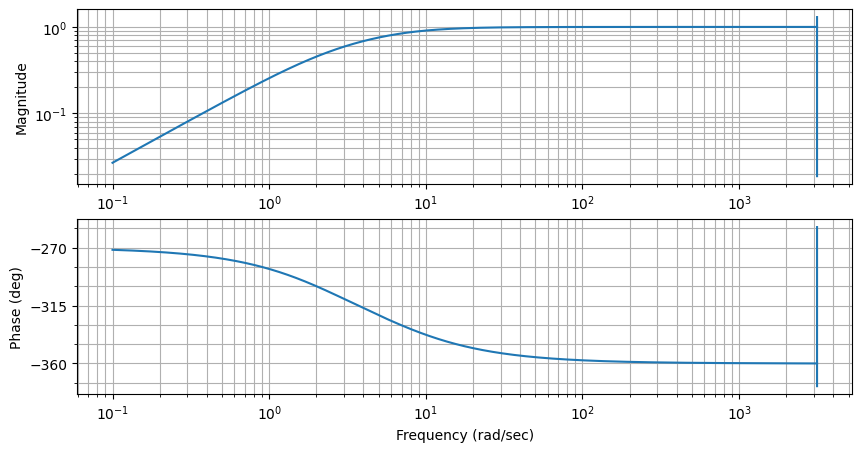

In [ ]:
plt.figure(figsize=(10,5))
control.bode_plot(sys_d)
plt.show()

In [ ]:
lti_system=lti(Coeficientes_num, Coeficientes_dem)          #Simulando sistema slit
N=4096          #Definiendo numero de muestras
t1, h=lti_system.impulse(N)              #obteneindo respuesta al impulso

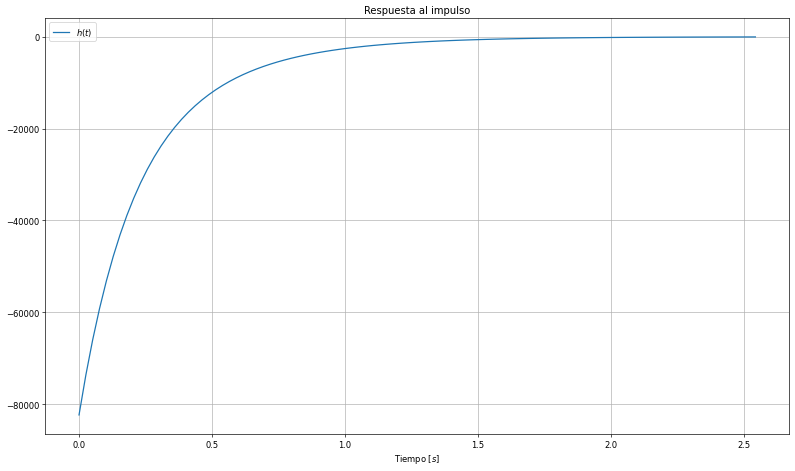

In [ ]:
plt.figure(figsize=(16,9), dpi=60)
plt.plot(t1,h, label='$h(t)$')
plt.grid(True)
plt.legend()
plt.title('Respuesta al impulso')
plt.xlabel('Tiempo [$s$]')
plt.show()

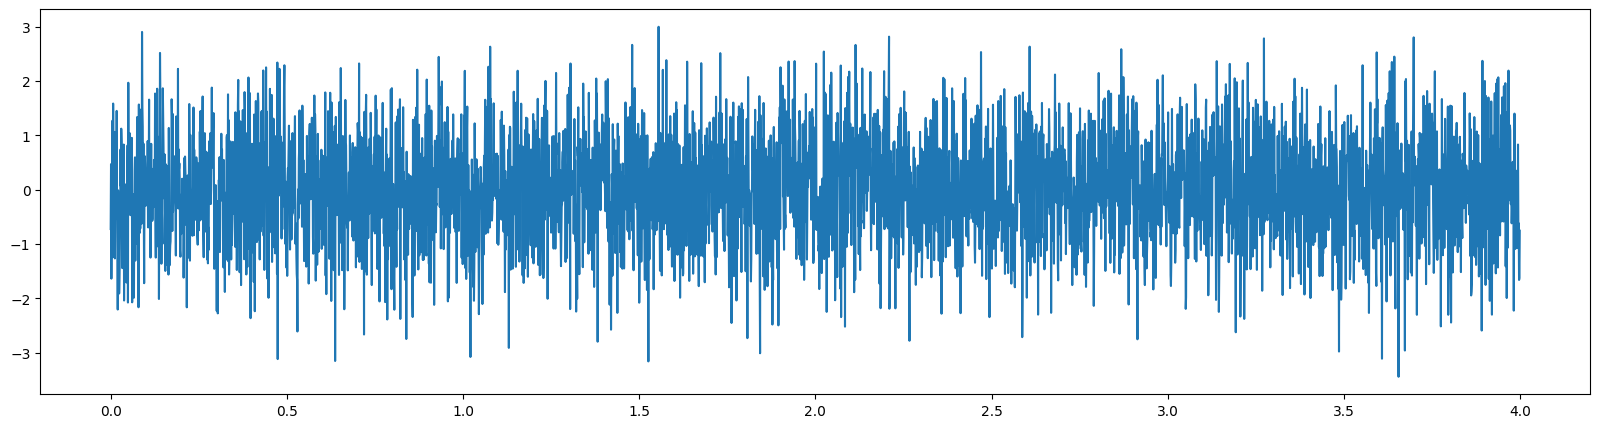

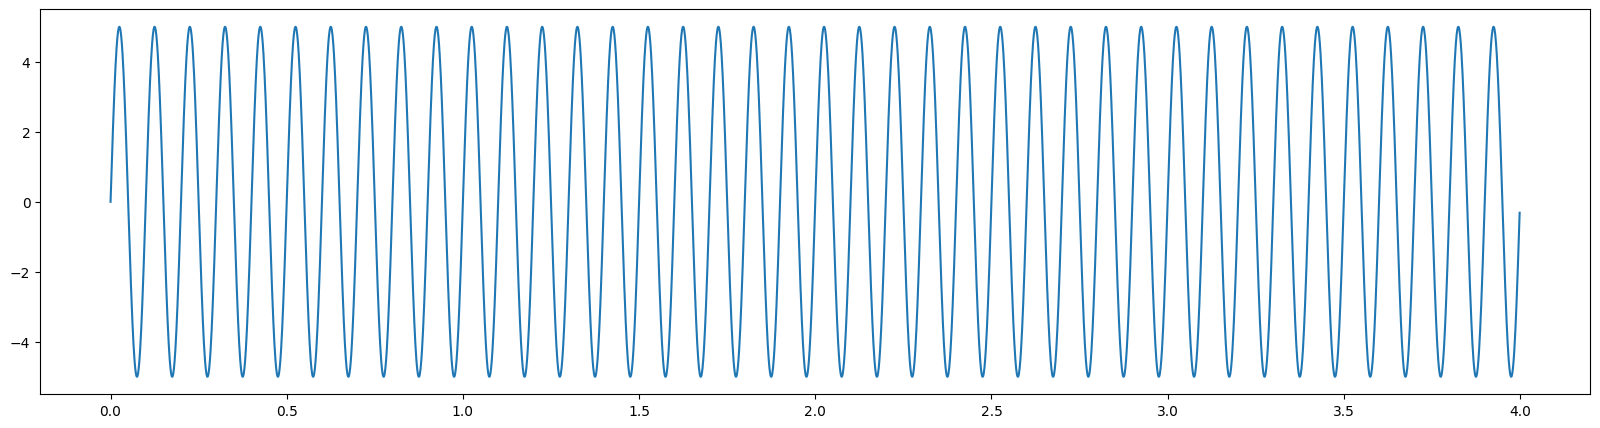

In [ ]:
##GENERAMOS LA SEÑAL
t=np.arange(0, 4,dt)## DEFINIMOS EL ESPACIADO DEL SISTEMA PARA CUADRAR LAS BASES DE TIEMPO
media = 0
varianza = 1
u = np.random.normal(media, varianza, len(t))## CON EL VECTOR DE TIEMPO YA ME ASEGURO QUE LAS BASES DE TIEMPO ESTEN CUADRADAS
plt.figure(figsize=(20,5))
plt.plot(t,u)

##Generamos una señal sinusoidal para verificar la respuesta del sistema
Frec_Des=10
xa=5*np.sin(2*np.pi*Frec_Des*t)
plt.figure(figsize=(20,5))
plt.plot(t,xa)

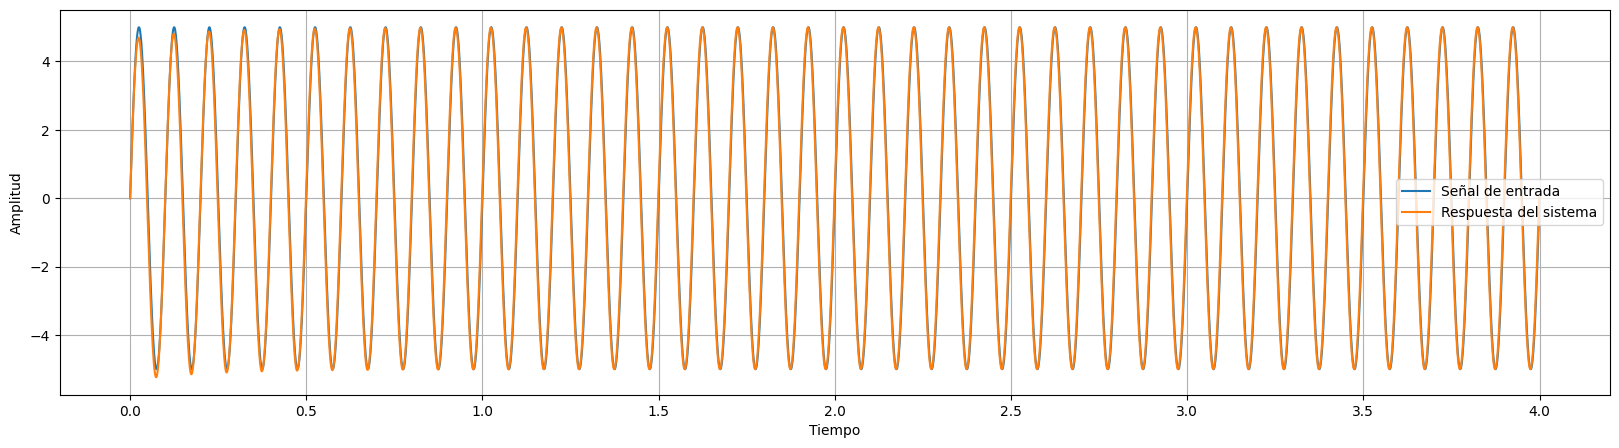

In [ ]:
## CALCULANDO LA SALIDA DEL SISTEMA
# Simular la respuesta del sistema a la señal de entrada
t_out, y = control.forced_response(sys_d, T=t, U=xa)
plt.figure(figsize=(20,5))
plt.plot(t, xa, label='Señal de entrada')
plt.plot(t_out, y, label='Respuesta del sistema')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(xa, y, test_size=0.3)

In [ ]:
# Construir el modelo de la red neuronal
model = Sequential()
model.add(Dense(8, input_dim=1, activation='tanh'))  # Capa de entrada
model.add(Dense(8, activation='tanh'))  # Capa oculta
model.add(Dense(1))  # Capa de salida

In [ ]:
# Compilar el modelo
model.compile(loss='mse', optimizer='adam')

In [ ]:
# Entrenar el modelo
history=model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
88/88 [==============================] - 1s 7ms/step - loss: 7.4207 - val_loss: 4.6613
Epoch 2/50
88/88 [==============================] - 0s 4ms/step - loss: 2.9472 - val_loss: 1.9231
Epoch 3/50
88/88 [==============================] - 0s 4ms/step - loss: 1.4403 - val_loss: 1.1885
Epoch 4/50
88/88 [==============================] - 0s 4ms/step - loss: 1.0044 - val_loss: 0.8814
Epoch 5/50
88/88 [==============================] - 0s 5ms/step - loss: 0.7412 - val_loss: 0.6237
Epoch 6/50
88/88 [==============================] - 0s 4ms/step - loss: 0.5196 - val_loss: 0.4316
Epoch 7/50
88/88 [==============================] - 0s 4ms/step - loss: 0.3657 - val_loss: 0.3115
Epoch 8/50
88/88 [==============================] - 0s 3ms/step - loss: 0.2734 - val_loss: 0.2383
Epoch 9/50
88/88 [==============================] - 0s 2ms/step - loss: 0.2166 - val_loss: 0.1952
Epoch 10/50
88/88 [==============================] - 0s 3ms/step - loss: 0.1827 - val_loss: 0.1676
Epoch 11/50
88/88 [

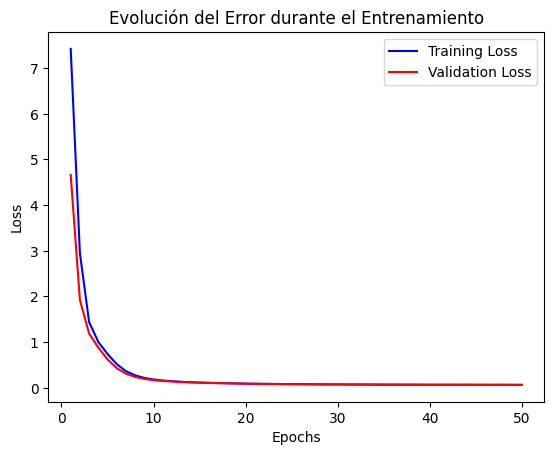

In [ ]:
# Obtener los valores de pérdida durante el entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar la evolución del error
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Evolución del Error durante el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

125/125 [==============================] - 0s 1ms/step


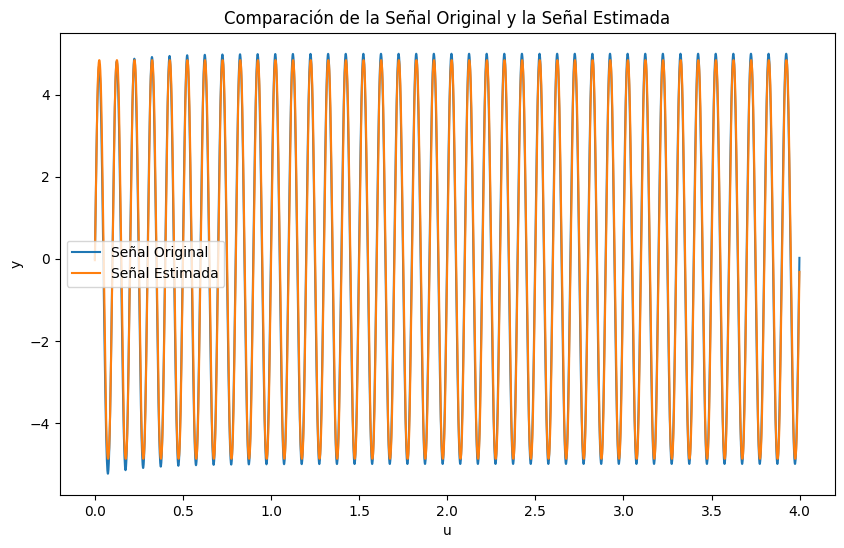

In [ ]:
# Realizar predicciones
predictions = model.predict(xa)

# Graficar la señal de salida original y la señal estimada por el modelo
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Señal Original')
plt.plot(t, predictions, label='Señal Estimada')
plt.title('Comparación de la Señal Original y la Señal Estimada')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Evaluar el rendimiento del modelo
mse = model.evaluate(u, y)
print("Error cuadrático medio (MSE):", mse)

125/125 [==============================] - 0s 1ms/step - loss: 13.4330
Error cuadrático medio (MSE): 13.433049201965332
